# Week 2: Optimal Bayesian Design with Mutual Information and Linear Regression

In [1]:
import autograd.numpy as np
from autograd import grad
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, integrate, optimize
from tqdm.notebook import tqdm, trange

In [2]:
# assumption
noise = 0.2

In [3]:
# NEW THINGS
def mut_2(d, covariance_prior):
    var_y = noise * np.eye(len(d))
    cov_posterior = covariance_prior - covariance_prior @ d.T @ np.linalg.inv(var_y + d @ covariance_prior @ d.T) @ d @ covariance_prior
    val = 0.5 * np.log(np.linalg.det(2*np.pi*np.e*cov_posterior)) - 0.5 * np.log(np.linalg.det(2*np.pi*np.e*covariance_prior))
    return val


In [4]:
prior = np.array([[7.9, 3], [4, 5]])
def f(x):
    return -mut_2(np.array([x]), prior)
def get_optimal_design(start):
    steps = optimize.minimize(f, start, method="BFGS", jac=grad(f), options={ "return_all": True })
    return steps


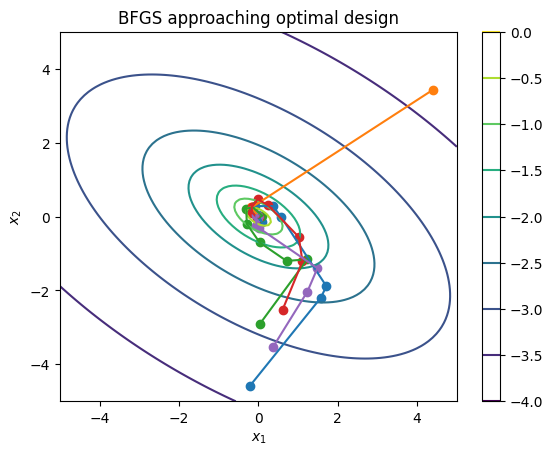

In [5]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        d = np.array([[x[i], y[j]]]).T
        Z[i][j] = mut_2(d.T, prior)

# Make the contour plot
fig, ax = plt.subplots()
contour = ax.contour(X, Y, Z)
for start in np.random.random((5,2)) * 10 - np.ones((5,2))*5:
    steps = get_optimal_design(start)
    ax.scatter(np.array(steps.allvecs)[:,0], np.array(steps.allvecs)[:,1])
    #for i in range(0, len(steps.allvecs), 2):
        #next_step = i + 1
        #if (i == len(steps.allvecs)):
        #    next_step = i
        #ax.arrow(steps.allvecs[i][0],steps.allvecs[i][1], steps.allvecs[next_step][0] - steps.allvecs[i][0], steps.allvecs[next_step][1] - steps.allvecs[i][1])
    ax.plot(np.array(steps.allvecs)[:,0], np.array(steps.allvecs)[:,1])
# Add a colorbar
cbar = fig.colorbar(contour)

# Add some labels and a title
ax.set_title('BFGS approaching optimal design')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Show the plot
plt.show()